In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('ad_spend.csv')
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [4]:
df.isnull().sum()

Ad Spend ($)    0
Season          0
Revenue ($)     0
dtype: int64

In [6]:
g = df.groupby('Season')[['Ad Spend ($)','Revenue ($)']].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


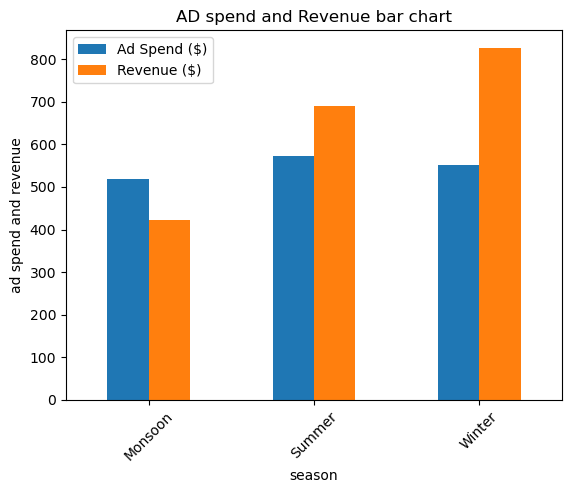

In [10]:
g.plot(kind="bar")
plt.title("AD spend and Revenue bar chart")
plt.xlabel("season")
plt.ylabel("ad spend and revenue")
plt.xticks(rotation=45)
plt.show()

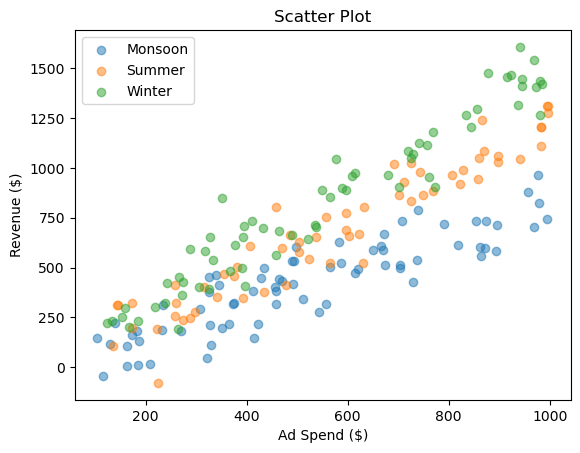

In [13]:
for season,subdf in df.groupby("Season"):
    plt.scatter(subdf['Ad Spend ($)'], subdf['Revenue ($)'], label=season,alpha=0.5)
plt.title("Scatter Plot")
plt.xlabel("Ad Spend ($)")    
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

In [14]:
df = pd.get_dummies(df,columns=['Season'],drop_first=True)
df.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,0,0
1,158,297,0,1
2,328,214,0,0
3,322,48,0,0
4,726,1048,0,1


In [15]:
X = df[['Ad Spend ($)','Season_Summer','Season_Winter']]
y = df['Revenue ($)']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

## using Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.score(X_test,y_test)

0.888209700047729

## using Decison Treee

In [26]:
from sklearn.tree import DecisionTreeRegressor
model_tree =  DecisionTreeRegressor()
model_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
model_tree.score(X_test,y_test)

0.8972778553142061

## Using Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model_gra =GradientBoostingRegressor(n_estimators=50)
model_gra.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=50)

In [35]:
model_gra.score(X_test,y_test)

0.9140298788684891

In [36]:
y_pred = model_gra.predict(X_test)

In [37]:
df_eval = pd.DataFrame({'Actual': y_test,"Predicted":y_pred})
df_eval.head()

,Actual,Predicted
59,605,679.716807
5,1125,1031.825410
20,699,642.020355
198,504,419.417281
52,1310,1120.105279


In [38]:
df_eval['diff %'] = abs((df_eval['Predicted'] - df_eval['Actual'])* 100/df_eval['Actual'])

In [39]:
df_eval.head()

,Actual,Predicted,diff %
59,605,679.716807,12.349885
5,1125,1031.825410,8.282186
20,699,642.020355,8.151594
198,504,419.417281,16.782285
52,1310,1120.105279,14.495780
